# 1. 금호동 위치선정 - 12곳
'금호동_주택단지_150m_내용추가.geojson'은 금호동 내 주택단지별 150m의 버퍼를 생성하여 그 주택단지의 위경도와 변수별 값을 갖고 있는 데이터이다

In [1]:
import pandas as pd
import geopandas as gpd
df_금호동 = gpd.read_file('금호동_주택단지_150m_내용추가.geojson')

/opt/app-root/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df_금호동.head()

,danji,경도,위도,field_1,gid,상권개수,인구정보,연면적,HubDist,trash,Busdistance,geometry
0,장미아파트1단지,127.73385,34.94269,6,라라213607,0,194,1697.35,14.692357,22700,166.694162,"MULTIPOLYGON (((127.73435 34.94140, 127.73433 ..."
1,장미아파트1단지,127.73385,34.94269,60,라라212608,0,186,902.20,0.701743,0,124.661302,"MULTIPOLYGON (((127.73260 34.94181, 127.73258 ..."
2,장미아파트1단지,127.73385,34.94269,65,라라213609,0,197,1751.93,8.402371,2800,265.319242,"MULTIPOLYGON (((127.73326 34.94271, 127.73326 ..."
3,장미아파트1단지,127.73385,34.94269,66,라라212607,1,152,1676.43,18.901518,0,71.682046,"MULTIPOLYGON (((127.73325 34.94143, 127.73322 ..."
4,장미아파트1단지,127.73385,34.94269,83,라라212609,0,0,117.62,18.635128,0,214.590296,"MULTIPOLYGON (((127.73221 34.94272, 127.73222 ..."


|변수|가중치|
|------|---|
|상권|-0.320905|
|인구정보|2.36554888|
|연면적|0.04822848|
|Busdistance|0.09531933|
|HubDist|-0.62530756|

In [3]:
df_groupby = df_금호동.groupby('danji').mean()

In [5]:
df_groupby['상권개수'] = df_groupby['상권개수']*(-0.320905)
df_groupby['인구정보'] = df_groupby['인구정보']*2.36554888
df_groupby['연면적'] = df_groupby['연면적']*0.04822848
df_groupby['Busdistance'] = df_groupby['Busdistance']*0.09531933
df_groupby['HubDist'] = df_groupby['HubDist']*(-0.62530756)

In [6]:
df_groupby.head(10)

,경도,위도,field_1,상권개수,인구정보,연면적,HubDist,trash,Busdistance
danji,,,,,,,,,
금당백합아파트1단지,127.72473,34.93463,632.285714,-0.687654,107.970410,67.236840,-31.877863,735.714286,9.102071
금당백합아파트2단지,127.72274,34.93332,205.833333,-0.802262,199.494622,94.635330,-19.316902,4758.333333,11.502652
금당백합아파트3단지,127.72099,34.93278,350.357143,-0.114609,154.774484,43.199834,-19.687907,4192.857143,13.086485
금당백합아파트4단지,127.71907,34.93273,602.933333,-0.128362,149.344986,49.520939,-30.914065,3580.000000,12.507302
동백아파트1단지,127.73066,34.93729,166.428571,-0.045844,220.502949,76.717146,-19.734424,2907.142857,8.670444
동백아파트2단지,127.72959,34.93870,219.307692,-0.000000,228.730380,45.911621,-20.626857,3907.692308,7.455895
동백아파트3단지,127.72832,34.93895,315.923077,-0.024685,225.455005,43.224107,-23.109238,5238.461538,10.913048
매화연립1단지,127.72178,34.93684,465.454545,-0.116693,206.878002,69.923141,-23.641245,1018.181818,13.250231
매화연립2단지,127.71956,34.93656,302.846154,-0.049370,268.762746,90.774977,-17.685904,4030.769231,14.365463


In [7]:
df1 = df_groupby.reset_index()

In [8]:
df1[df1['danji']=='장미아파트1단지']

,danji,경도,위도,field_1,상권개수,인구정보,연면적,HubDist,trash,Busdistance
27,장미아파트1단지,127.73385,34.94269,651.857143,-0.022922,151.395128,29.564885,-32.798284,1978.571429,25.386185


In [9]:
df_금호동1 = df_groupby[['상권개수','인구정보','연면적','Busdistance','HubDist','trash','경도','위도']]

In [10]:
df_금호동1.head() 

,상권개수,인구정보,연면적,Busdistance,HubDist,trash,경도,위도
danji,,,,,,,,
금당백합아파트1단지,-0.687654,107.970410,67.236840,9.102071,-31.877863,735.714286,127.72473,34.93463
금당백합아파트2단지,-0.802262,199.494622,94.635330,11.502652,-19.316902,4758.333333,127.72274,34.93332
금당백합아파트3단지,-0.114609,154.774484,43.199834,13.086485,-19.687907,4192.857143,127.72099,34.93278
금당백합아파트4단지,-0.128362,149.344986,49.520939,12.507302,-30.914065,3580.000000,127.71907,34.93273
동백아파트1단지,-0.045844,220.502949,76.717146,8.670444,-19.734424,2907.142857,127.73066,34.93729


In [11]:
df_금호동1 = df_금호동1.reset_index()

In [23]:
df_금호동1.head()

,danji,상권개수,인구정보,연면적,Busdistance,HubDist,trash,경도,위도
0,금당백합아파트1단지,-0.687654,107.970410,67.236840,9.102071,-31.877863,735.714286,127.72473,34.93463
1,금당백합아파트2단지,-0.802262,199.494622,94.635330,11.502652,-19.316902,4758.333333,127.72274,34.93332
2,금당백합아파트3단지,-0.114609,154.774484,43.199834,13.086485,-19.687907,4192.857143,127.72099,34.93278
3,금당백합아파트4단지,-0.128362,149.344986,49.520939,12.507302,-30.914065,3580.000000,127.71907,34.93273
4,동백아파트1단지,-0.045844,220.502949,76.717146,8.670444,-19.734424,2907.142857,127.73066,34.93729


In [43]:
df_금호동1.iloc[:,0:7]

,danji,상권개수,인구정보,연면적,Busdistance,HubDist,trash
0,금당백합아파트1단지,-0.687654,107.970410,67.236840,9.102071,-31.877863,735.714286
1,금당백합아파트2단지,-0.802262,199.494622,94.635330,11.502652,-19.316902,4758.333333
2,금당백합아파트3단지,-0.114609,154.774484,43.199834,13.086485,-19.687907,4192.857143
3,금당백합아파트4단지,-0.128362,149.344986,49.520939,12.507302,-30.914065,3580.000000
4,동백아파트1단지,-0.045844,220.502949,76.717146,8.670444,-19.734424,2907.142857
5,동백아파트2단지,-0.000000,228.730380,45.911621,7.455895,-20.626857,3907.692308
6,동백아파트3단지,-0.024685,225.455005,43.224107,10.913048,-23.109238,5238.461538
7,매화연립1단지,-0.116693,206.878002,69.923141,13.250231,-23.641245,1018.181818
8,매화연립2단지,-0.049370,268.762746,90.774977,14.365463,-17.685904,4030.769231
9,매화연립3단지,-0.000000,181.302425,72.391431,12.345054,-19.553463,3728.571429


<AxesSubplot:>

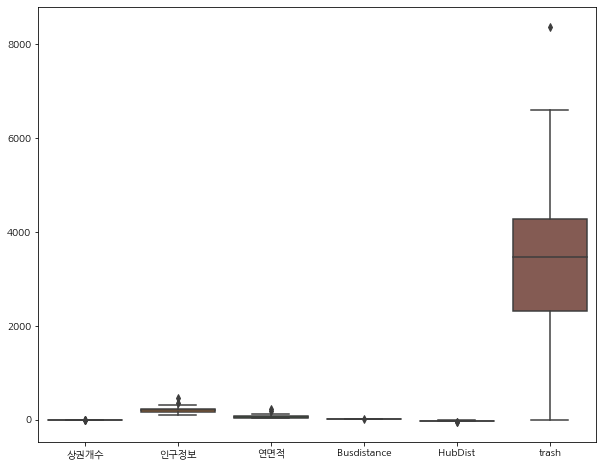

In [44]:
import matplotlib.pyplot as plt
import matplotlib as mat

import matplotlib.font_manager as fonm
font_list = [font.name for font in fonm.fontManager.ttflist]
mat.rcParams['font.family'] = 'NanumGothic'

import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(data=df_금호동1.iloc[:,0:7])

In [36]:
df1 = df_금호동1[['danji','위도','경도']]

In [37]:
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()

minmaxScaler.fit(df_금호동1.iloc[:,1:7])
a = minmaxScaler.transform(df_금호동1.iloc[:,1:7])

In [39]:
df = pd.DataFrame(a)*100
df = df.rename(columns={0:'상권개수',1:'인구정보',2:'연면적',3:'Busdistance',4:'HubDist',5:'trash'})

<AxesSubplot:>

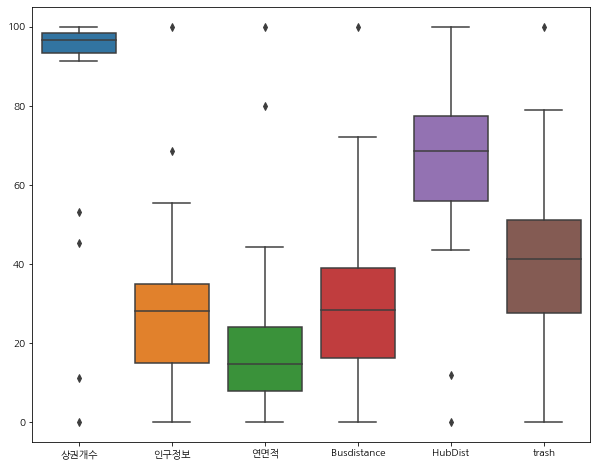

In [41]:
import matplotlib.font_manager as fonm
font_list = [font.name for font in fonm.fontManager.ttflist]
mat.rcParams['font.family'] = 'NanumGothic'

import seaborn as sns
plt.figure(figsize=(10,8))
sns.boxplot(data=df)

In [15]:
df['sum'] = df.sum(axis=1)

In [17]:
df_score = pd.concat([df1,df],axis=1)

In [18]:
df_score.head(1)

,danji,위도,경도,상권개수,인구정보,연면적,Busdistance,HubDist,trash,sum
0,금당백합아파트1단지,34.93463,127.72473,53.125,2.232614,19.492665,9.180974,46.199959,8.788396,139.019608


In [19]:
df_score['rank'] = df_score['sum'].rank(method='min', ascending=False)

In [20]:
df_score.head()

,danji,위도,경도,상권개수,인구정보,연면적,Busdistance,HubDist,trash,sum,rank
0,금당백합아파트1단지,34.93463,127.72473,53.1250,2.232614,19.492665,9.180974,46.199959,8.788396,139.019608,33.0
1,금당백합아파트2단지,34.93332,127.72274,45.3125,26.990601,32.723198,22.569385,78.086876,56.840159,262.522719,21.0
2,금당백합아파트3단지,34.93278,127.72099,92.1875,14.893467,7.885369,31.402668,77.145050,50.085324,273.599378,15.0
3,금당백합아파트4단지,34.93273,127.71907,91.2500,13.424747,10.937784,28.172479,48.646630,42.764505,235.196146,29.0
4,동백아파트1단지,34.93729,127.73066,96.8750,32.673511,24.070637,6.773725,77.026964,34.726962,272.146799,18.0


In [21]:
df_score[df_score['danji']=='장미아파트1단지']

,danji,위도,경도,상권개수,인구정보,연면적,Busdistance,HubDist,trash,sum,rank
27,장미아파트1단지,34.94269,127.73385,98.4375,13.979326,1.30115,100.0,43.863402,23.634812,281.216191,12.0


In [86]:
df_score =df_score.sort_values('rank',ascending=True)
df_score.head(12)

,danji,위도,경도,상권개수,인구정보,연면적,Busdistance,HubDist,trash,sum,rank
23,사랑아파트2단지,34.93443,127.71712,95.312500,100.000000,100.000000,36.527671,73.115236,100.000000,504.955407,1.0
24,사랑아파트3단지,34.93575,127.71728,96.875000,68.690669,80.008896,41.741715,65.572503,78.924915,431.813698,2.0
8,매화연립2단지,34.93656,127.71956,96.634615,45.728149,30.859062,38.535729,82.227283,48.149121,342.133958,3.0
22,사랑아파트1단지,34.93313,127.71703,96.875000,37.381337,41.431244,72.122731,11.926106,63.566553,323.302971,4.0
31,초원아파트2단지,34.93795,127.72008,95.312500,55.481330,29.721674,33.554518,61.422524,42.662116,318.154663,5.0
14,목련빌라5단지,34.93968,127.72891,98.437500,39.438155,9.612029,15.928051,89.300898,58.105802,310.822435,6.0
13,목련빌라4단지,34.93992,127.72769,97.083333,33.261608,7.096994,28.064104,85.316682,54.152446,304.975168,7.0
18,목련아파트3단지,34.93781,127.73220,98.437500,37.701287,15.022705,8.596393,100.000000,37.713311,297.471195,8.0
9,매화연립3단지,34.93562,127.71958,100.000000,22.069475,21.981780,27.267593,77.486347,44.539249,293.344443,9.0
6,동백아파트3단지,34.93895,127.72832,98.317308,34.013079,7.897090,19.281075,68.459754,62.575479,290.543785,10.0


|변수|가중치|
|------|---|
|상권|-0.320905|
|인구정보|2.36554888|
|연면적|0.04822848|
|Busdistance|0.09531933|
|HubDist|-0.62530756|

In [64]:
danji = df_score.reset_index()
danji['rank'] = danji['rank'].astype(int)
danji[['danji','rank']]

,danji,rank
0,사랑아파트2단지,1
1,사랑아파트3단지,2
2,매화연립2단지,3
3,사랑아파트1단지,4
4,초원아파트2단지,5
5,목련빌라5단지,6
6,목련빌라4단지,7
7,목련아파트3단지,8
8,매화연립3단지,9
9,동백아파트3단지,10


In [88]:
danji_score = danji[['danji','상권개수','인구정보','연면적','Busdistance','HubDist','trash','sum','rank','위도','경도']]
danji_score.head(33)

,danji,상권개수,인구정보,연면적,Busdistance,HubDist,trash,sum,rank,위도,경도
0,사랑아파트2단지,95.312500,100.000000,100.000000,36.527671,73.115236,100.000000,504.955407,1,34.93443,127.71712
1,사랑아파트3단지,96.875000,68.690669,80.008896,41.741715,65.572503,78.924915,431.813698,2,34.93575,127.71728
2,매화연립2단지,96.634615,45.728149,30.859062,38.535729,82.227283,48.149121,342.133958,3,34.93656,127.71956
3,사랑아파트1단지,96.875000,37.381337,41.431244,72.122731,11.926106,63.566553,323.302971,4,34.93313,127.71703
4,초원아파트2단지,95.312500,55.481330,29.721674,33.554518,61.422524,42.662116,318.154663,5,34.93795,127.72008
5,목련빌라5단지,98.437500,39.438155,9.612029,15.928051,89.300898,58.105802,310.822435,6,34.93968,127.72891
6,목련빌라4단지,97.083333,33.261608,7.096994,28.064104,85.316682,54.152446,304.975168,7,34.93992,127.72769
7,목련아파트3단지,98.437500,37.701287,15.022705,8.596393,100.000000,37.713311,297.471195,8,34.93781,127.73220
8,매화연립3단지,100.000000,22.069475,21.981780,27.267593,77.486347,44.539249,293.344443,9,34.93562,127.71958
9,동백아파트3단지,98.317308,34.013079,7.897090,19.281075,68.459754,62.575479,290.543785,10,34.93895,127.72832


In [89]:
danji_score.to_csv('최종결과물.csv',encoding='utf-8')

# 2. 금호동 제외(광양읍, 광영동, 중동, 마동) 위치선정 - 38곳

In [90]:
df_4지역 = gpd.read_file('금호동_제외_주택단지_150m_내용추가.geojson')
df_4지역latlon = gpd.read_file('4개동_공동주택단지_금호동제외.geojson')

In [91]:
df_4지역.head()

,danji,field_1,gid,인구정보,상권,연면적,Busdistance,HubDist,trash_pd,geometry
0,오성타워아파트단지,836,라라068632,82,16,346.19,138.724068,12.508444,0.000000,"MULTIPOLYGON (((127.57558 34.96443, 127.57554 ..."
1,오성타워아파트단지,837,라라068633,11,4,339.82,120.001914,7.987256,0.000000,"MULTIPOLYGON (((127.57546 34.96456, 127.57544 ..."
2,오성타워아파트단지,838,라라068634,0,0,496.62,170.404193,42.091881,4.453917,"MULTIPOLYGON (((127.57517 34.96546, 127.57520 ..."
3,오성타워아파트단지,885,라라069632,186,12,561.87,76.235001,5.593077,4.102894,"MULTIPOLYGON (((127.57668 34.96398, 127.57665 ..."
4,오성타워아파트단지,886,라라069633,385,13,1862.09,31.109471,33.092109,2.236429,"MULTIPOLYGON (((127.57558 34.96456, 127.57558 ..."


|변수|가중치|
|------|---|
|상권|-0.320905|
|인구정보|2.36554888|
|연면적|0.04822848|
|Busdistance|0.09531933|
|HubDist|-0.62530756|

In [92]:
df_4지역1 = df_4지역.groupby('danji').mean()

In [93]:
df_4지역1.head()

,field_1,인구정보,상권,연면적,Busdistance,HubDist,trash_pd
danji,,,,,,,
가야아파트단지,7172.785714,254.142857,3.000000,2893.510714,111.098344,25.128809,0.000000
광양e편한세상아파트,6535.571429,103.714286,21.714286,1361.202857,123.901041,28.679916,0.000000
광양덕례수시아아파트단지,562.214286,140.571429,4.142857,1915.109286,169.167376,40.662895,123.357886
광양로제비앙1차아파트,6184.055556,260.333333,3.944444,3697.583333,135.097861,37.998236,0.000000
광양마동주공아파트단지,6104.500000,195.062500,5.187500,2531.984375,119.139245,52.316224,0.000000


In [94]:
df_4지역1['상권'] = df_4지역1['상권']*(-0.320905)
df_4지역1['인구정보'] = df_4지역1['인구정보']*2.36554888
df_4지역1['연면적'] = df_4지역1['연면적']*0.04822848
df_4지역1['Busdistance'] = df_4지역1['Busdistance']*0.09531933
df_4지역1['HubDist'] = df_4지역1['HubDist']*(-0.62530756)

In [95]:
df_4지역1.head()

,field_1,인구정보,상권,연면적,Busdistance,HubDist,trash_pd
danji,,,,,,,
가야아파트단지,7172.785714,601.187351,-0.962715,139.549624,10.589820,-15.713234,0.000000
광양e편한세상아파트,6535.571429,245.341212,-6.968223,65.648745,11.810164,-17.933768,0.000000
광양덕례수시아아파트단지,562.214286,332.528585,-1.329464,92.362810,16.124921,-25.426815,123.357886
광양로제비앙1차아파트,6184.055556,615.831225,-1.265792,178.328824,12.877438,-23.760584,0.000000
광양마동주공아파트단지,6104.500000,461.429878,-1.664695,122.113758,11.356273,-32.713730,0.000000


In [96]:
df_4지역2 = df_4지역1[['상권','인구정보','연면적','Busdistance','HubDist','trash_pd']]

In [97]:
df_4지역2.head()

,상권,인구정보,연면적,Busdistance,HubDist,trash_pd
danji,,,,,,
가야아파트단지,-0.962715,601.187351,139.549624,10.589820,-15.713234,0.000000
광양e편한세상아파트,-6.968223,245.341212,65.648745,11.810164,-17.933768,0.000000
광양덕례수시아아파트단지,-1.329464,332.528585,92.362810,16.124921,-25.426815,123.357886
광양로제비앙1차아파트,-1.265792,615.831225,178.328824,12.877438,-23.760584,0.000000
광양마동주공아파트단지,-1.664695,461.429878,122.113758,11.356273,-32.713730,0.000000


In [98]:
df_4지역latlon.head()

,danji,위도,경도,geometry
0,오성타워아파트단지,34.96532,127.57681,POINT (127.57681 34.96532)
1,영신그린빌아파트단지,34.96301,127.57270,POINT (127.57270 34.96301)
2,광양덕례수시아아파트단지,34.96936,127.56842,POINT (127.56842 34.96936)
3,덕례대림아파트단지,34.96908,127.56482,POINT (127.56482 34.96908)
4,광양스카이뷰,34.96740,127.56854,POINT (127.56854 34.96740)


In [99]:
df_4지역3 = pd.merge(df_4지역2,df_4지역latlon,on='danji',how='left')

In [100]:
df_4지역4 = df_4지역3[['danji','상권','인구정보','연면적','Busdistance','HubDist','trash_pd','경도','위도']]

In [101]:
df_4지역4.head(5)

,danji,상권,인구정보,연면적,Busdistance,HubDist,trash_pd,경도,위도
0,가야아파트단지,-0.962715,601.187351,139.549624,10.589820,-15.713234,0.000000,127.71480,34.96648
1,광양e편한세상아파트,-6.968223,245.341212,65.648745,11.810164,-17.933768,0.000000,127.69887,34.93926
2,광양덕례수시아아파트단지,-1.329464,332.528585,92.362810,16.124921,-25.426815,123.357886,127.56842,34.96936
3,광양로제비앙1차아파트,-1.265792,615.831225,178.328824,12.877438,-23.760584,0.000000,127.69117,34.95177
4,광양마동주공아파트단지,-1.664695,461.429878,122.113758,11.356273,-32.713730,0.000000,127.68945,34.95637


In [102]:
df2 = df_4지역4[['danji','위도','경도']]

In [103]:
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()

minmaxScaler.fit(df_4지역4.iloc[:,1:7])
b = minmaxScaler.transform(df_4지역4.iloc[:,1:7])

In [116]:
df_금호동제외 = pd.DataFrame(b)*100

In [117]:
df_금호동제외['sum'] = df_금호동제외.sum(axis=1)

In [118]:
df_금호동제외 = df_금호동제외.rename(columns={0:'상권개수',1:'인구정보',2:'연면적',3:'Busdistance',4:'HubDist',5:'trash_pd'})

In [119]:
df_score_금제 = pd.concat([df2,df_금호동제외],axis=1) #단지 위도 경도

In [120]:
df_score_금제.head(5)

,danji,위도,경도,상권개수,인구정보,연면적,Busdistance,HubDist,trash_pd,sum
0,가야아파트단지,34.96648,127.71480,87.333333,42.716730,28.731958,13.928657,77.975642,0.000000,250.686320
1,광양e편한세상아파트,34.93926,127.69887,0.000000,15.111393,12.099932,17.932572,71.967721,0.000000,117.111618
2,광양덕례수시아아파트단지,34.96936,127.56842,82.000000,21.875094,18.112161,32.089163,51.694389,26.302475,232.073282
3,광양로제비앙1차아파트,34.95177,127.69117,82.925926,43.852752,37.459549,21.434265,56.202577,0.000000,241.875068
4,광양마동주공아파트단지,34.95637,127.68945,77.125000,31.874819,24.807867,16.443368,31.978772,0.000000,182.229826


In [121]:
df_score_금제['rank'] = df_score_금제['sum'].rank(method='min', ascending=False)

In [122]:
df_score_금제 =df_score_금제.sort_values('rank',ascending=True)
df_score_금제.head(12)

,danji,위도,경도,상권개수,인구정보,연면적,Busdistance,HubDist,trash_pd,sum,rank
29,대광로제비앙3차아파트단지,34.95175,127.68992,65.647059,100.000000,100.000000,6.957793,82.353970,0.000000,354.958821,1.0
53,성호2차아파트단지,34.93225,127.69070,83.000000,96.262693,94.038791,28.690972,37.133011,0.000000,339.125467,2.0
28,대광로제비앙2차아파트단지,34.95175,127.68877,76.078431,87.704746,97.733215,10.057690,63.659791,0.000000,335.233873,3.0
8,광양송보파인빌5차아파트단지,34.95322,127.68932,75.925926,95.144148,82.087608,6.641845,68.407407,0.000000,328.206934,4.0
72,칠성e편한세상아파트단지,34.97503,127.57557,72.000000,27.393540,17.871003,22.699076,73.771519,100.000000,313.735138,5.0
71,창덕에버빌2차아파트단지,34.97303,127.61028,76.666667,61.159611,63.436003,39.193819,72.286680,0.000000,312.742780,6.0
74,칠성주공2단지아파트,34.98250,127.58438,92.291667,25.073433,12.296946,64.934539,68.447032,40.121011,303.164628,7.0
70,창덕에버빌1차아파트단지,34.97466,127.60917,73.333333,53.019576,52.120480,27.137612,89.095217,0.000000,294.706219,8.0
27,남해오네뜨아파트단지,34.96808,127.61041,92.666667,42.310383,38.146679,38.125486,72.416637,0.000000,283.665852,9.0
45,부영아파트단지,34.96733,127.58384,74.666667,18.388380,2.154105,40.077028,88.532312,56.414595,280.233086,10.0


In [123]:
df_score_금제['rank'] = df_score_금제['rank'].astype(int)
df_score_금제[['danji','rank']]

,danji,rank
29,대광로제비앙3차아파트단지,1
53,성호2차아파트단지,2
28,대광로제비앙2차아파트단지,3
8,광양송보파인빌5차아파트단지,4
72,칠성e편한세상아파트단지,5
...,...,...
69,진아리채아파트,76
23,그린파크맨션아파트단지,77
41,무등파크멘션아파트단지,78
26,남양파크아파트단지,79


In [124]:
df_score_금제 = df_score_금제[['danji','상권개수','인구정보','연면적','Busdistance','HubDist','trash_pd','sum','rank','위도','경도']]
df_score_금제

,danji,상권개수,인구정보,연면적,Busdistance,HubDist,trash_pd,sum,rank,위도,경도
29,대광로제비앙3차아파트단지,65.647059,100.000000,100.000000,6.957793,82.353970,0.0,354.958821,1,34.95175,127.68992
53,성호2차아파트단지,83.000000,96.262693,94.038791,28.690972,37.133011,0.0,339.125467,2,34.93225,127.69070
28,대광로제비앙2차아파트단지,76.078431,87.704746,97.733215,10.057690,63.659791,0.0,335.233873,3,34.95175,127.68877
8,광양송보파인빌5차아파트단지,75.925926,95.144148,82.087608,6.641845,68.407407,0.0,328.206934,4,34.95322,127.68932
72,칠성e편한세상아파트단지,72.000000,27.393540,17.871003,22.699076,73.771519,100.0,313.735138,5,34.97503,127.57557
...,...,...,...,...,...,...,...,...,...,...,...
69,진아리채아파트,78.933333,3.134662,6.125628,23.223467,44.288104,0.0,155.705194,76,34.94939,127.69650
23,그린파크맨션아파트단지,95.666667,14.141405,10.775072,31.379290,0.000000,0.0,151.962434,77,34.96771,127.71335
41,무등파크멘션아파트단지,30.666667,25.178296,25.409121,13.144634,55.303571,0.0,149.702288,78,34.94527,127.68980
26,남양파크아파트단지,17.000000,25.309376,26.186307,14.495717,62.067948,0.0,145.059348,79,34.94331,127.68973


In [125]:
df_score_금제.to_csv('최종결과물_금호동제외.csv',encoding='utf-8')